# A2.2

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

os.makedirs('./results', exist_ok=True)

with open('./brown_100.txt', 'r') as file_:
    corpus = file_.read()

def write_freqs(list_: list, filename: str) -> None:
    with open(f'./results/{filename}.txt', 'w') as file_:
        file_.write('\n'.join([' '.join(x[0]) + ' | ' + str(x[1]) for x in list_]))

## N-Gram Language Modeling
In the second assignment, you will implement an **n-gram language model** that processes input text to generate, analyze, and calculate the probabilities of sequences of `n` words (n-grams). This model will tokenize text, create n-grams, and compute their frequencies and probabilities, returning the most frequent n-grams in the text.

1. **Tokenization**: Convert the input text into a list of words (tokens).
2. **N-gram Generation**: Create sequences of `n` tokens from the text, treating each sentence independently with the inclusion of start (`<s>`) and end (`</s>`) markers.
3. **Frequency Counting**: Count how many times each n-gram appears in the text.
4. **Probability Calculation**: Compute the probabilities of each n-gram based on its frequency and add alpha smoothing to improve generalization of items.
5. **Most Frequent N-grams**: Return the most frequent n-grams along with their probabilities, helping to identify common patterns in the text.

In [2]:
import nltk
from collections import Counter, defaultdict

nltk.download('punkt')
nltk.download('punkt_tab')

class NGramModel:
    def __init__(self, text, n, alpha=0.0):
        """
        Initialize the NGramModel with text and the value of n.
        """
        self.text = text
        self.n = n
        self.alpha = alpha  # Alpha value for additive smoothing
        self.ngrams = {}
        self.probabilities = {}
        self.vocab = set()

    def tokenize(self) -> None:
        """
        Tokenize the text into words.
        Fill in the code to split the text into a list of words.
        """
        cleaned_text = self.text.replace('<s>', '').replace('</s>', '')
        sentences = nltk.sent_tokenize(cleaned_text)
        tokens = [nltk.word_tokenize(sent.lower()) for sent in sentences]
        return tokens

    def generate_ngrams(self, tokens: list) -> dict:
        """
        Generate n-grams from the list of tokens.
        Fill in the code to create n-grams.
        Make sure to treat each sentence independently, include the <s> and </s> tokens.
        """
        ngram_list = []
        for sentence in tokens:
            padded_tokens = ['<s>'] * (self.n - 1) + sentence + ['</s>']

            self.vocab.update(padded_tokens)

            for i in range(len(padded_tokens)- self.n + 1):
                ngram_list.append(tuple(padded_tokens[i:i+self.n]))

        self.ngrams = ngram_list
        return self.ngrams

    def count_frequencies(self) -> None:
        """
        Count the frequencies of each n-gram.
        Fill in the code to count n-gram occurrences.
        """
        self.ngrams = Counter(self.ngrams)


    def calculate_probabilities(self) -> None:
        """
        Calculate probabilities of each n-gram based on its frequency. Add alpha smoothing separately.
        """
        self.probabilities = {}
        words_count = Counter()
        vocab_size = len(self.vocab)

        for ngram, num in self.ngrams.items():
            word = ngram[:-1]
            words_count[word] += num

        for ngram, num in self.ngrams.items():
            word = ngram[:-1]
            numerator = num + self.alpha
            denominator = words_count[word] + self.alpha * vocab_size
            self.probabilities[ngram] = numerator / denominator



    def most_frequent_ngrams(self, top_n: int = 10) -> list:
        """
        Return the most frequent n-grams and their probabilities.
        """
        sort_ngrams = sorted(self.ngrams.items(), key=lambda x: x[1], reverse=True)[:top_n]

        sorted_grams = []
        for ngram, freq in sort_ngrams:
            prob = self.probabilities.get(ngram)
            sorted_grams.append((ngram, freq, prob))

        return sorted_grams


text = "This is a simple example to demonstrate how n-grams work in this assignment."
n = 2
model = NGramModel(text, n)

tokens = model.tokenize()
ngrams = model.generate_ngrams(tokens)
model.count_frequencies()
model.calculate_probabilities()

print(model.most_frequent_ngrams(10))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[(('<s>', 'this'), 1, 1.0), (('this', 'is'), 1, 0.5), (('is', 'a'), 1, 1.0), (('a', 'simple'), 1, 1.0), (('simple', 'example'), 1, 1.0), (('example', 'to'), 1, 1.0), (('to', 'demonstrate'), 1, 1.0), (('demonstrate', 'how'), 1, 1.0), (('how', 'n-grams'), 1, 1.0), (('n-grams', 'work'), 1, 1.0)]


In [3]:
import math

def perplexity(model, tokens):
    n = model.n
    sum_probability_log = 0
    word_count = 0

    for sentence in tokens:
        padded = ['<s>'] * (n - 1) + sentence + ['</s>']

        for i in range(len(padded) - n + 1):
            ngram = tuple(padded[i:i+n])

            if ngram in model.probabilities:
                prob = model.probabilities[ngram]

            else:
                vocab_size = len(model.vocab)
                if vocab_size == 0:
                    vocab_size = 1

                alpha = model.alpha
                if alpha == 0:
                  alpha = 1e-8
                denominator = alpha * vocab_size
                prob = alpha / (alpha * vocab_size)

            sum_probability_log += math.log(prob)
            word_count += 1

    return math.exp(-sum_probability_log / word_count)


### Unigrams

In this section, we apply the `NGramModel` to our corpus. The model can be configured to generate unigrams, bigrams, or trigrams by adjusting the value of `n`. After tokenizing the text and generating the n-grams, the model counts the occurrences of each n-gram and calculates their probabilities. The most frequent n-grams are then written to an output file.

By adjusting the n-gram size, we can analyze different levels of word dependencies in the text, providing insights into common word sequences and patterns.  

The code below will generate unigrams when the NGramModel is implemented correctly

In [4]:
n = 1  # You can change this to 1, 2, or 3 for uni, bi, or trigrams
model = NGramModel(corpus, n)

tokens = model.tokenize()
ngrams = model.generate_ngrams(tokens)
model.count_frequencies()
model.calculate_probabilities()

write_freqs(model.most_frequent_ngrams(10), 'unigrams')
#for ngram, prob in model.probabilities.items():
    #print(f"{ngram}: {prob:.4f}")

unigram_perplexity = perplexity(model, tokens)
print("Perplexity:", unigram_perplexity)

Perplexity: 266.71699436815993


### Bigrams
Bigrams allow us to explore word pairs and their relationships, providing insight into common word combinations and phrase structures within the corpus.  
The code below will generate bigrams when the NGramModel is implemented correctly.

In [5]:
n = 2  # You can change this to 1, 2, or 3 for uni, bi, or trigrams
model = NGramModel(corpus, n)

tokens = model.tokenize()
ngrams = model.generate_ngrams(tokens)
model.count_frequencies()
model.calculate_probabilities()

write_freqs(model.most_frequent_ngrams(10), 'bigrams')


bigram_perplexity = perplexity(model, tokens)
print("Perplexity:", bigram_perplexity)


Perplexity: 5.335748895915144


### Trigrams
Trigrams capture three-word sequences, providing a deeper understanding of longer word dependencies and commonly occurring phrases within the text.  
The code below will generate trigrams when the NGramModel is implemented correctly

In [6]:
n = 3  # You can change this to 1, 2, or 3 for uni, bi, or trigrams
model = NGramModel(corpus, n)

tokens = model.tokenize()
ngrams = model.generate_ngrams(tokens)
model.count_frequencies()
model.calculate_probabilities()

write_freqs(model.most_frequent_ngrams(10), 'trigrams')
trigram_perplexity = perplexity(model, tokens)
print("Perplexity:", trigram_perplexity)



Perplexity: 1.472548321158181


### Smoothing
Below, we generate **bigrams** with **smoothing** applied by setting `n = 2` and including a smoothing parameter `alpha = 1.0`. Smoothing is useful in language models to handle unseen n-grams by assigning a small probability to them. The model tokenizes the text, generates bigrams, counts their frequencies, and calculates smoothed probabilities. The most frequent bigrams are then written to an output file.





In [7]:
n = 2  # You can change this to 1, 2, or 3 for uni, bi, or trigrams
model = NGramModel(corpus, n, alpha=3)

tokens = model.tokenize()
ngrams = model.generate_ngrams(tokens)
model.count_frequencies()
model.calculate_probabilities()

write_freqs(model.most_frequent_ngrams(10), 'bigrams_smoothed')

#smoothing_perplexity = perplexity(model, tokens)
#print("Perplexity:", smoothing_perplexity)

for ngram, prob in model.probabilities.items():
    print(f"{ngram}: {prob:.4f}")



('<s>', 'the'): 0.0108
('the', 'fulton'): 0.0035
('fulton', 'county'): 0.0037
('county', 'grand'): 0.0017
('grand', 'jury'): 0.0025
('jury', 'said'): 0.0045
('said', 'friday'): 0.0016
('friday', 'an'): 0.0017
('an', 'investigation'): 0.0017
('investigation', 'of'): 0.0017
('of', 'atlanta'): 0.0024
('atlanta', "'s"): 0.0021
("'s", 'recent'): 0.0016
('recent', 'primary'): 0.0017
('primary', 'election'): 0.0017
('election', 'produced'): 0.0017
('produced', '``'): 0.0017
('``', 'no'): 0.0016
('no', 'evidence'): 0.0017
('evidence', '``'): 0.0017
('``', 'that'): 0.0020
('that', 'any'): 0.0016
('any', 'irregularities'): 0.0017
('irregularities', 'took'): 0.0017
('took', 'place'): 0.0017
('place', '.'): 0.0017
('.', '</s>'): 0.0388
('the', 'jury'): 0.0062
('jury', 'further'): 0.0016
('further', 'said'): 0.0017
('said', 'in'): 0.0016
('in', 'term-end'): 0.0016
('term-end', 'presentments'): 0.0017
('presentments', 'that'): 0.0017
('that', 'the'): 0.0033
('the', 'city'): 0.0027
('city', 'executiv

### Generating Text
In this example, we generate text using the **bigrams** model by providing a starting **prompt** (e.g., "the jury"). The `generate_text` function creates a sequence of words based on the trained bigram model, starting from the provided prompt and continuing based on the probabilities of the next words.

After tokenizing the corpus, generating bigrams, and calculating their frequencies and probabilities, the model uses these learned probabilities to generate text. The generated output is then written to a file.

Text generation with n-grams helps illustrate how language models can predict word sequences, allowing us to create new sentences that follow similar patterns found in the original text.

In [8]:
import random

def generate_text(model: NGramModel, n: int, prompt: str, max_words: int = 20) -> str:
    generated_tokens = prompt.lower().split()

    for i in range(max_words):
        context = tuple(generated_tokens[-(n - 1):])

        next_words = {}
        for ngram, probability in model.probabilities.items():
            if ngram[:-1] == context:
                next_words[ngram[-1]] = probability

        if not next_words:
            break

        next_word = ''
        highest_prob = 0
        for word, probability in next_words.items():
            if probability > highest_prob:
                next_word = word
                highest_prob = probability


        if next_word == '</s>':
            break

        generated_tokens.append(next_word)

    return ' '.join(generated_tokens)

tokens = model.tokenize()
ngrams = model.generate_ngrams(tokens)
model.count_frequencies()
model.calculate_probabilities()
generated_text = generate_text(model, 2, 'the jury')
print(generated_text)
with open(f'./results/generated_bigrams.txt', 'w') as file_:
    file_.write(generated_text)

the jury said .



# A2.3

## Word Vectors
Based on the Stanford course: https://web.stanford.edu/class/cs224n/

### Count based W2V
In this section, we use the previously trained **n-gram model** to calculate a **co-occurrence matrix**. A co-occurrence matrix shows how often words appear together within a specific context (in this case, bigrams), providing insights into word relationships in the corpus.

Steps:
1. **Tokenization and N-gram Generation**: We first tokenize the text and generate bigrams using the `NGramModel`.
2. **Vocabulary and Indexing**: The vocabulary is created from the unique tokens, and a word-to-index mapping is established.
3. **Co-occurrence Matrix**: Using the generated n-grams, we compute the co-occurrence matrix, where each entry represents how often two words occur together within the bigrams.

The co-occurrence matrix provides a numerical representation of word relationships, which is useful for tasks like word embeddings, semantic analysis, and understanding word associations.

In [9]:
import pandas as pd

model = NGramModel(corpus, 2)
tokens = model.tokenize()
ngrams = model.generate_ngrams(tokens)

def create_co_matrix(ngrams: list, vocab_size: int, word_to_index: dict) -> np.ndarray:
    import numpy as np
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=int)

    for ngram in ngrams:
            word1, word2 = ngram
            if word1 in word_to_index and word2 in word_to_index:
                i = word_to_index[word1]
                j = word_to_index[word2]
                co_matrix[i][j] += 1

    return co_matrix

vocab = list(set(word for sentence in tokens for word in sentence))
vocab_size = len(vocab)

word_to_index = {word: idx for idx, word in enumerate(vocab)}


co_matrix = create_co_matrix(ngrams, vocab_size, word_to_index)



With the code below you can verify if the co-occurence works

In [10]:
def check_co_occurrence(word1, word2, co_matrix, word_to_index):
    """
    Print the co-occurrence count for a specific word pair.
    """
    if word1 not in word_to_index or word2 not in word_to_index:
        print(f"One or both words '{word1}' and '{word2}' are not in the vocabulary.")
        return

    index1 = word_to_index[word1]
    index2 = word_to_index[word2]

    co_count = co_matrix[index1][index2]
    print(f"Co-occurrence count for '{word1}' and '{word2}': {co_count}")

check_co_occurrence('the', 'jury', co_matrix, word_to_index)
check_co_occurrence('the', 'cat', co_matrix, word_to_index)

Co-occurrence count for 'the' and 'jury': 13
One or both words 'the' and 'cat' are not in the vocabulary.


In this part, we reduce the dimensionality of the **co-occurrence matrix** using **Singular Value Decomposition (SVD)**. This technique helps in extracting the most important features from the matrix, making it easier to visualize and interpret the relationships between words.

Steps:
1. **Singular Value Decomposition (SVD)**: The co-occurrence matrix is decomposed into three matrices: \( M = U \cdot \Sigma \cdot V^T \).
2. **Dimensionality Reduction**: We retain only the top `k` components (default is 2) from the SVD, effectively reducing the dimensionality of the matrix.
3. **Reduced Matrix**: The reduced matrix retains the most important semantic information and can be used for tasks such as **word embedding visualization** or **semantic similarity analysis**.

Dimensionality reduction allows us to capture the essence of word relationships in fewer dimensions, making it more efficient to process and visualize the data.

In [11]:
def reduce_to_k_dim(M, k=2):
    from sklearn.decomposition import TruncatedSVD

    svd = TruncatedSVD(n_components=k)
    M_reduced = svd.fit_transform(M)

    return M_reduced

In this final part, we visualize the reduced word embeddings in **2D space**. After reducing the dimensionality of the co-occurrence matrix using SVD, we plot the embeddings for each word to observe their relationships in a low-dimensional space.

Steps:
1. **Plotting the Embeddings**: Each word from the vocabulary is plotted based on its 2D coordinates from the reduced matrix.
2. **Visualization**: The scatter plot allows us to see how words cluster together or relate to each other based on co-occurrences in the text. Words with similar contexts should appear closer to each other in the plot.
3. **Interpretation**: By looking at the 2D plot, we can analyze word similarities, relationships, and clusters formed by words that often occur together.

This visualization is a useful tool for understanding the structure of word embeddings and the relationships between words in the corpus.







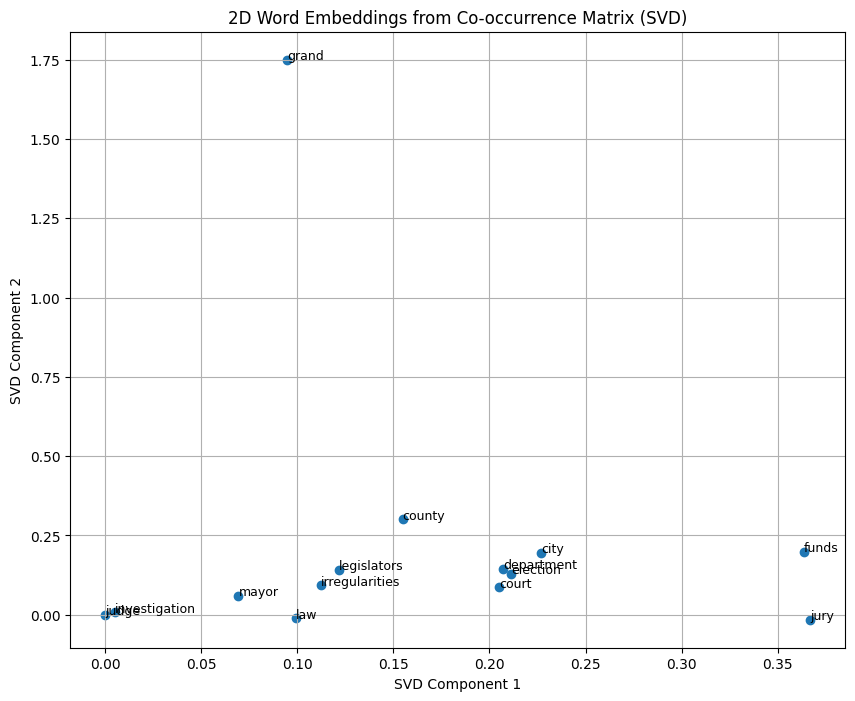

In [ ]:
import matplotlib.pyplot as plt
def plot_embeddings(M_reduced, words):
    word_to_index = {word: i for i, word in enumerate(vocab)}

    words_in_vocab = [word for word in words if word in word_to_index]

    x_coordinates = [M_reduced[word_to_index[word]][0] for word in words_in_vocab]
    y_coordinates = [M_reduced[word_to_index[word]][1] for word in words_in_vocab]

    plt.figure(figsize=(10, 8))
    plt.scatter(x_coordinates, y_coordinates)

    for word, x, y in zip(words_in_vocab, x_coordinates, y_coordinates):
        plt.text(x, y, word, fontsize=9)

    plt.title("2D Word Embeddings from Co-occurrence Matrix (SVD)")
    plt.xlabel("SVD Component 1")
    plt.ylabel("SVD Component 2")
    plt.grid(True)
    plt.show()

#change of word list
words = ['grand', 'jury', 'investigation', 'election', 'irregularities',
    'judge', 'court', 'law', 'department', 'legislators',
    'mayor', 'funds', 'city', 'county']

M = create_co_matrix(ngrams, vocab_size, word_to_index)
M_reduced = reduce_to_k_dim(M, 2)
plot_embeddings(M_reduced, words)

## Prediction-Based Word Vectors
In this section, we load pre-trained word vectors using the **GloVe** embeddings from the [Stanford NLP paper on GloVe](https://nlp.stanford.edu/pubs/glove.pdf). The pre-trained embeddings provide rich semantic information about words based on large text corpora, allowing us to represent words as vectors that capture their meaning and relationships.

Steps:
1. **Load GloVe Word Vectors**: We use the GloVe embeddings from the `glove-wiki-gigaword-200` model, which has 200-dimensional vectors for each word.
2. **Vocabulary Matching**: We map the words from our corpus to the GloVe vocabulary and extract the corresponding vectors.
3. **Dimensionality Reduction**: After obtaining the word vectors, we reduce the dimensionality to visualize the embeddings in 2D space, allowing us to explore word relationships visually.

This is an excellent opportunity to explore how pre-trained embeddings like GloVe can be used to improve downstream NLP tasks by providing richer word representations.

In [ ]:
#!pip install -q numpy==1.23.5 scipy==1.10.1 gensim==4.3.1 --force-reinstall --no-cache-dir

In [ ]:
 #!pip install numpy==1.24.4
 #!pip install gensim

In [ ]:
# Do not edit
import gensim.downloader as api
import numpy as np
wv_from_bin = api.load("glove-wiki-gigaword-200")
print("Loaded vocab size %i" % len(list(wv_from_bin.index_to_key)))

wv_words = list(wv_from_bin.index_to_key)
unique_tokens = set(word for sentence in tokens for word in sentence)
word2ind = {}
M = []
idx = 0
print('rendering M based on wv')
for w in wv_words:
    try:
        M.append(wv_from_bin.get_vector(w))
        word2ind[w] = idx
        idx += 1
    except:
        pass

print('rendering M based on unique_tokens')
for w in unique_tokens:
    if w in wv_words:
        continue
    try:
        M.append(wv_from_bin.get_vector(w))
        word2ind[w] = idx
        idx += 1
    except:
        pass
M = np.stack(M)
M_reduced = reduce_to_k_dim(M, k=2)

M_lengths = np.linalg.norm(M_reduced, axis=1)
M_reduced_normalized = M_reduced / M_lengths[:, np.newaxis]
print(M_reduced_normalized)

Loaded vocab size 400000
rendering M based on wv
rendering M based on unique_tokens
[[ 0.9839149  -0.17863765]
 [ 0.9850587   0.17221868]
 [ 0.99598855 -0.08948034]
 ...
 [-0.99832445  0.05786423]
 [-0.9901505   0.14000705]
 [-0.9573135   0.28905183]]


### Compare plots
What stands out when comparing the two different ways of embedding using the given words?

(Use this to help answer the question in your assignment document).

When comparing the plot of count vectors and the plot of prediction vectors, it can be observed that the words in the count-vector plot, which is based on word counts, are more scattered and that the words in the plot of the prediction vectors, which is based on word prediction, are more grouped together. Additionally, the plot of prediction vectors shows that the legal-related words "law", "court", and "judge" are not as tightly clustered together as expected and are more spread out, but unrelated words such as "department" and "city" are appearing closer together. From this result, it can be concluded that the count-based methods only clusters on the co-occurrence of words but is therefore not always able to make functional clustering as it does not understand the deeper semantic meaning. In contrast, prediction-based methods cluster the legal terms (e.g. "judge", "legislators") tighter, which means that the model has been able to capture semantic relationship as it has learnt to group words with a similar role or meaning based on the context in which the words are appearing. However, it is not perfect, as seen in the plot of the prediction vectors, where, for example, the word "jury" is not clustered with the other legal terms.


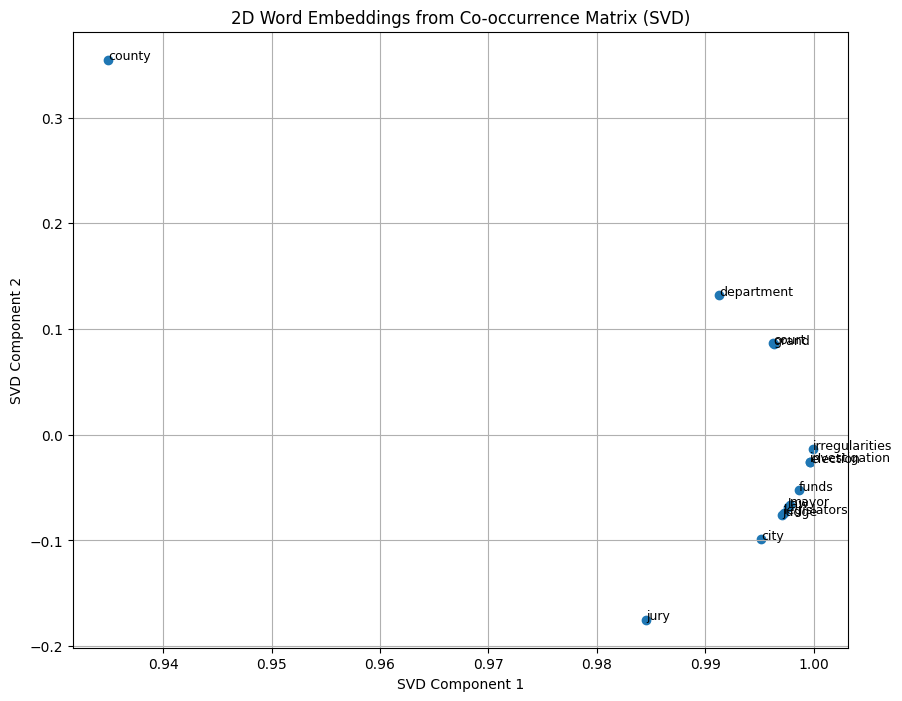

In [ ]:
plot_embeddings(M_reduced_normalized, words)

In [ ]:
#print(wv_from_bin.most_similar('jury'))

[('jurors', 0.8326282501220703), ('verdict', 0.7091138362884521), ('juries', 0.6967692375183105), ('trial', 0.6840686202049255), ('prosecutors', 0.6517122983932495), ('judge', 0.6424550414085388), ('defendant', 0.6376617550849915), ('hearing', 0.6365344524383545), ('defendants', 0.6333721280097961), ('court', 0.6295028924942017)]


### Words with multiple meanings
Polysemes and homonyms are words that have more than one meaning (see [this wiki page](https://en.wikipedia.org/wiki/Polysemy) to learn more about the difference between polysemes and homonyms). Your task is to find a word with at least two different meanings such that the top-10 most similar words (according to cosine similarity) contain related words from both meanings.

For example:
- "leaves" has both the "go_away" and "a_structure_of_a_plant" meanings in the top 10.
- "scoop" has both "handed_waffle_cone" and "lowdown" meanings in the top 10.

You will probably need to try several polysemous or homonymic words before you find one.

Once you discover a word that fits this criterion, state the word and explain the multiple meanings that occur in the top 10. Reflect on why many of the polysemous or homonymic words you tried didn’t work (i.e., why the top-10 most similar words only contain one of the word's meanings).

**Note**: Use the `wv_from_bin.most_similar(word)` function to get the top 10 most similar words. This function ranks all other words in the vocabulary based on their cosine similarity to the given word. For further assistance, you can refer to the [Gensim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html).

In [ ]:
#https://www.yourdictionary.com/articles/words-multiple-meanings (crane double-meaning: bird and machine)

wv_from_bin.most_similar("crane")

[('cranes', 0.5964999198913574),
 ('gantry', 0.5616371631622314),
 ('sandhill', 0.5329699516296387),
 ('sarus', 0.49083182215690613),
 ('ichabod', 0.47095462679862976),
 ('barge', 0.4651164412498474),
 ('niles', 0.44390004873275757),
 ('frasier', 0.4307387173175812),
 ('whooping', 0.42178642749786377),
 ('treadwheel', 0.4141821563243866)]

## *Explanation Results:*

`The` word **"crane"** has a double meaning: "bird" and a "machine that lifts an object". As observed from the output, the top-10 most similar words according to the cosine similairy contained related words from both meanings of the word "crane". The words "sandhill", "sarus" and "whooping"  are related to the first definition "bird" and the words "gantry", "treadwheel", and "barge" are related to the second defition "machine that lifts an object".  This balanced results shows that the word "crane" is good example for a polysemous, as the the top similar words is balanced for both meanings. For other meanings, it can be the case that only one meaning is presented, which can be explained that the synonym words for the other meaning are not appearing frequent enough in the training data, leading to the model grouping one meaning in its context over another.

### Synonyms
When considering **Cosine Similarity**, it's often useful to think of **Cosine Distance**, which is simply 1 - Cosine Similarity.

Find three words \( (w_1, w_2, w_3) \) where:
- \(w_1\) and \(w_2\) are **synonyms**.
- \(w_1\) and \(w_3\) are **antonyms**.

However, you need to find a case where **Cosine Distance** \( (w_1, w_3) < \text{Cosine Distance} (w_1, w_2) \). In other words, the antonym is **closer** to the word than its synonym in the vector space.

For example, "happy" (\(w_1\)) may be closer to "sad" (\(w_3\)) than to "cheerful" (\(w_2\)), which is counter-intuitive since we expect synonyms to be closer than antonyms.

Once you find such an example, provide a possible explanation for why this result may have occurred.

Use the `wv_from_bin.distance(w1, w2)` function to compute the cosine distance between two words. You can refer to the [Gensim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html) for further assistance.







In [ ]:
#example
#wv_from_bin.distance("happy", "cheerful")
#wv_from_bin.distance("happy", "sad")

print(wv_from_bin.distance("fast", "quick"))
print(wv_from_bin.distance("fast", "slow"))

0.3328641653060913
0.2522680163383484


## *Explanation Results:*

For this example the three words: **fast, quick and slow** are used. **fast** is w_1, **quick** is w_2, **slow** is w_3. **fast** and **quick** are synonyms and **fast** and **slow** are antonyms. As observed from the results the cosine distance from the antonyms is smaller (0.252) then the cosine distance from the synonyms (0.333), which means that in vector space the word **slow** is closer to the word **fast**, eventhough in langauge the two words share an opposite meaning. An explaination for this result can be that the antonyms are appearing in a similar context, which can lead to the result that the model is grouping them together, eventough both words share an opposite meaning.

### Analogies
Word vectors have demonstrated the ability to solve analogies based on their learned semantic relationships. For instance, consider the analogy:

**"man : grandfather :: woman : x"**

(Read: man is to grandfather as woman is to x). Using word vectors, we can find the word \(x\) that completes the analogy.

In the example provided, we use the `most_similar` function from the Gensim library. This function identifies words that are most similar to the words in the positive list and most dissimilar to those in the negative list. For analogy solving, it effectively computes:

\[ \text{word}(x) = \text{most similar to} (\text{woman} + \text{grandfather} - \text{man}) \]

The result is the word with the highest cosine similarity to the target vector. You can use this approach to explore various analogies and gain insights into the semantic structure of word vectors.

Refer to the [Gensim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html) for more details on the `most_similar` function and how word vectors handle analogy-solving tasks.

In [ ]:
# Run this cell to answer the analogy -- man : grandfather :: woman : x
print(wv_from_bin.most_similar(positive=['woman', 'grandfather'], negative=['man']))

[('grandmother', 0.7608445286750793), ('granddaughter', 0.7200808525085449), ('daughter', 0.7168302536010742), ('mother', 0.7151536345481873), ('niece', 0.7005682587623596), ('father', 0.6659887433052063), ('aunt', 0.6623408794403076), ('grandson', 0.6618767976760864), ('grandparents', 0.644661009311676), ('wife', 0.6445354223251343)]


## *Explanation Results:*

This word vector searches for words that are most similar to the words in the positve list and most dissimalr to those in the negative list. For this example, the positive list contains the words woman and grandfather and the negative list contains the words man. With the use of the word vectors, the most similar word to a "female version" of the word "grandfather" is grandmather, as observed in the results as that is the higest ranked.


### Bias in word vectors
a. **Observation**: **Consider the results of a word vector model when queried with analogies involving "man", "woman", and "profession". What are the top results returned by the model for each query?**

This word vector searches for words that are most similar to the words in the positve list and most dissimalr to those in the negative list. For the first query, the top 5 words that are similar to the word "profession" associated with man than female are: "reputation", "professions", "skill", "skills" and "ethnic". For the second query, the top 5 words that are simlar to the word "profession" associated with female than man are: "professions", "practitioner, "teaching", "nursing" and "vocation".

b. **Analysis**: **Do you observe any gender biases in the results? For example, are certain professions more closely associated with "man" or "woman" based on the word vectors? Discuss how word embeddings might perpetuate societal biases present in the training data.**


From the results gender biases can be observed, because the words that are similiar to "profession" for women are related to the education or care jobs, as words such as "teaching" and "nursing" and other related words are selected. The words similar to the word "profession" for men are more powerful than for the words related to femals, indicating that the similar words for males are more related to prestige professions as words such as "respected" and "reputation" are selected. This difference in results generatedby the model, indicates this gender bias as the model generates stereotyping results, indiacting that it must have been trained on text that included these sterotypes that male have high status professions and female more nurture-like professions. Word embeddings will also perpetuate these societal biases if they are presented in the training data, as they learn from a large text corpus and if that corpus includes text with these gender biases connecting professions nursing/education professions for woman and high-status/engineering prfofessions for man then the word embeddings will learn that these words often occur together, so it must have semantic relatedness and apply this in similar context, leadning to the repition of the sterotypes eventhough times have changed and the steortypes as well.


c. **Reflection**: **How might such biases affect the fairness of machine learning models that use word embeddings? Suggest potential strategies for mitigating gender bias in word vector models.**

These biases can have an affect of the fairness of ML models that use words embeddings, as when these models are applied in companies for hiring staff, then the ML models that use these biased word vectors will make these sterotype assoications of gender and the particualr profession [1]. So, this can lead to the model selecting a male candite for a particualr profession over a female candiate, as it has learned that a "respected" profession should be occupied by a male than a female, leading to unfair treatment and the growth of the inequalities between man and woman that has been going on for ages.
Potential strategies for mitigrating gender bias in word vector models are to equally represent the male and female group and to add fairness rules during the training period, so that while the model is learning it will treath both groups equally and not give a preference to a particualr group.

[1] Patel, P.: Ethical Issues of Word Embeddings: From Bias to Fairness. Medium (2024). https://medium.com/@prakul2003/ethical-issues-of-word-embeddings-from-bias-to-fairness-045041c2066d. Accessed 21 Apr 2025.


In [ ]:
print(wv_from_bin.most_similar(positive=['man', 'profession'], negative=['woman']))
print()
print(wv_from_bin.most_similar(positive=['woman', 'profession'], negative=['man']))

[('reputation', 0.5250176787376404), ('professions', 0.5178037881851196), ('skill', 0.49046966433525085), ('skills', 0.49005505442619324), ('ethic', 0.4897659420967102), ('business', 0.4875852167606354), ('respected', 0.485920250415802), ('practice', 0.482104629278183), ('regarded', 0.4778572618961334), ('life', 0.4760662019252777)]

[('professions', 0.5957457423210144), ('practitioner', 0.49884122610092163), ('teaching', 0.48292139172554016), ('nursing', 0.48211804032325745), ('vocation', 0.4788965880870819), ('teacher', 0.47160351276397705), ('practicing', 0.46937814354896545), ('educator', 0.46524327993392944), ('physicians', 0.4628995358943939), ('professionals', 0.4601394236087799)]
